In [1]:
import pandas as pd

In [2]:
# надо больше столбцов для отображения
pd.options.display.max_columns = 30

In [3]:
# загрузим и посмотрим что на входе
raw_data = pd.read_csv('stud_math.csv')
raw_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


#### Описание датасета
- school — аббревиатура школы, в которой учится ученик
- sex — пол ученика ('F' - женский, 'M' - мужской)
- age — возраст ученика (от 15 до 22)
- address — тип адреса ученика ('U' - городской, 'R' - за городом)
- famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
- schoolsup — дополнительная образовательная поддержка (yes или no)
- famsup — семейная образовательная поддержка (yes или no)
- paid — дополнительные платные занятия по математике (yes или no)
- activities — дополнительные внеучебные занятия (yes или no)
- nursery — посещал детский сад (yes или no)
- higher — хочет получить высшее образование (yes или no)
- internet — наличие интернета дома (yes или no)
- romantic — в романтических отношениях (yes или no)
- famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
- goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- absences — количество пропущенных занятий
- score — баллы по госэкзамену по математике

In [42]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

- есть пропуски во многих столбцах
- столбец "studytime, granular", значения в котором не понятны. Описания на него нет. Если не получим объяснения из источника датасета, то выкинем этот столбец
- типы столбцов float лучше привести к типам int
- типы столбцов object надо категоризировать?
- отдельные столбцы переименуем для большей понятности
- неясно, что такое "внеучебные неудачи" - failures

In [13]:
raw_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


- в столбце Fedu есть значение выше описанного диапазона 0-4
- в столбце famrel есть значение ниже диапазона 1-5
- в столбце absences есть подозрительно большое значение

In [56]:
# посмотрим сколько строк с неполными данными
raw_data[raw_data.isna().max(axis=1)].shape[0]

298

больше половины строк имеют пропуски, значит будем не выкидывать данные, а заполнять пропуски

In [43]:
# копируем сырые данные, удаляя непонятный столбец
data = raw_data.drop(columns='studytime, granular')

In [44]:
# делаем читабельные названия столбцов
columns_to_rename = {
    'famsize': 'family_size',
    'Pstatus': 'parents_live',
    'Medu': 'mother_education',
    'Fedu': 'father_education',
    'Mjob': 'mother_job',
    'Fjob': 'father_job',
    'schoolsup': 'education_support',
    'famsup': 'family_support',
    'paid': 'math_paid_lessons',
    'nursery': 'kindergarten',
    'famrel': 'family_relations',
    'goout': 'friends_time'
}
data.rename(columns=columns_to_rename, inplace=True)

In [67]:
# посмотрим что в father_education выходит за предел
data['father_education'].value_counts()

2.0    130
3.0     96
4.0     89
1.0     78
0.0      2
Name: father_education, dtype: int64

In [66]:
# есть одно значение 40, будем считать, что это опечатка и должно быть 4
data['father_education'].replace(40, 4, inplace = True)

In [70]:
# посмотрим что в family_relations выходит за предел
data['family_relations'].value_counts()

4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: family_relations, dtype: int64

In [69]:
# есть одно значение -1, будем считать, что это опечатка и должно быть 1
data['family_relations'].replace(-1, 1, inplace = True)

54.0       1
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
17.0       1
30.0       1
15.0       2
11.0       2
13.0       2
22.0       3
9.0        3
1.0        3
20.0       4
5.0        5
18.0       5
7.0        6
16.0       7
3.0        8
12.0      12
14.0      12
10.0      17
8.0       21
6.0       31
2.0       60
4.0       65
0.0      111
Name: absences, dtype: int64

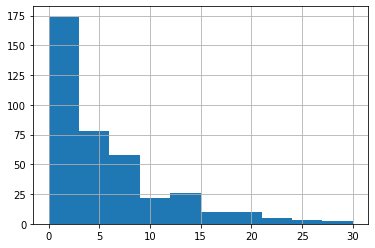

In [90]:
# посмотрим что в absences по распределению
data['absences'][data['absences'] < 35].hist()
data['absences'].value_counts().sort_values()

In [54]:
# разбираемся с NaN в численных столбцах
numeric_columns = list(data.select_dtypes(include=['integer', 'float']).columns)
# в столбце age пропусков нет
# остальные столбцы заполним медианными значениями
for i_column in numeric_columns:
    data[i_column] = data[i_column].fillna(data[i_column].median())

In [61]:
# в нашем датасете все числовые столбцы можно перевести в unsigned int
numeric_columns = list(data.select_dtypes(include=['integer', 'float']).columns)
print(columns_to_int)
new_int = data[columns_to_int].apply(pd.to_numeric, downcast='unsigned', errors='raise')
new_int.info()
new_int['family_relations'].value_counts()

['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'family_relations', 'freetime', 'friends_time', 'health', 'absences', 'score']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               395 non-null    uint8  
 1   mother_education  395 non-null    uint8  
 2   father_education  395 non-null    uint8  
 3   traveltime        395 non-null    uint8  
 4   studytime         395 non-null    uint8  
 5   failures          395 non-null    uint8  
 6   family_relations  395 non-null    float64
 7   freetime          395 non-null    uint8  
 8   friends_time      395 non-null    uint8  
 9   health            395 non-null    uint8  
 10  absences          395 non-null    uint16 
 11  score             395 non-null    uint8  
dtypes: float64(1), uint16(1), uint8(10)
memory usage: 7.8 KB


 4.0    209
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: family_relations, dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             395 non-null    object 
 1   sex                395 non-null    object 
 2   age                395 non-null    int64  
 3   address            378 non-null    object 
 4   family_size        368 non-null    object 
 5   parents_live       350 non-null    object 
 6   mother_education   392 non-null    float64
 7   father_education   371 non-null    float64
 8   mother_job         376 non-null    object 
 9   father_job         359 non-null    object 
 10  reason             378 non-null    object 
 11  guardian           364 non-null    object 
 12  traveltime         367 non-null    float64
 13  studytime          388 non-null    float64
 14  failures           373 non-null    float64
 15  education_support  386 non-null    object 
 16  family_support     356 non